# Interpreting Star Wars Survey Data
This project entails an in-depth analysis of an online survey (SurveyMonkey) pertaining to the Star Wars franchise. The survey data used was initially collected by FiveThirtyEight in 2014 and can be accessed directly via [GitHub](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). In this notebook, the following questions are explored:

- Which Star Wars movie do respondents consider the best?
- Which movies are the most watched?
- How does movie ranking and viewership vary according to:
    - Gender
    - Age
- In terms of character favorability:
    - Which character is the most liked?
    - Which character is the most hated?
    - Which character is the most controversial?

In [1]:
import numpy as np
import pandas as pd

star_wars = pd.read_csv("star_wars.csv", encoding='ISO-8859-1')
pd.set_option('display.max_columns', 500)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


In [2]:
list(star_wars.columns)

['RespondentID',
 'Have you seen any of the 6 films in the Star Wars franchise?',
 'Do you consider yourself to be a fan of the Star Wars film franchise?',
 'Which of the following Star Wars films have you seen? Please select all that apply.',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'Unnamed: 8',
 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Which character shot first?',
 'Are you familiar with the Expanded Universe?',
 'Do you consider yourself to be a fan of the Expan

## Data Cleaning
Since the data used is survey data, it likely requires data cleaning prior to performing any analysis. To start we can check how many missing values are in each column.

In [3]:
# Check null values counts
star_wars.isnull().sum()

RespondentID                                                                                                                                       1
Have you seen any of the 6 films in the Star Wars franchise?                                                                                       0
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            350
Which of the following Star Wars films have you seen? Please select all that apply.                                                              513
Unnamed: 4                                                                                                                                       615
Unnamed: 5                                                                                                                                       636
Unnamed: 6                                                                                                

There are NaN values in the `RespondentID` column, which should be unique. We will remove rows corresponding to the NaN values in this column as a result.

In [4]:
# Save first row info - additional question info
q_topics = star_wars.iloc[0,:]

# Remove NaN from RespondentID
star_wars = star_wars.loc[pd.notnull(star_wars['RespondentID'])]

In [5]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


A quick glance at the columns indicates that some columns contain Yes/No responses to questions. As a result they can be converted to boolean since it makes it easier to filter out data based on these questions. NaNs indicate the respondent didn't answer the question, so we can leave these values as is.

In [6]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=False)

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [7]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

Yes    552
NaN    350
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [8]:
star_wars['Are you familiar with the Expanded Universe?'].value_counts(dropna=False)

No     615
NaN    358
Yes    213
Name: Are you familiar with the Expanded Universe?, dtype: int64

In [9]:
star_wars['Do you consider yourself to be a fan of the Expanded Universe?Â\x8cÃ¦'].value_counts(dropna=False)

NaN    973
No     114
Yes     99
Name: Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦, dtype: int64

In [10]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts(dropna=False)

No     641
Yes    427
NaN    118
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

In [11]:
# Convert Yes/No answer columns to boolean type (True/False)
yes_no = {"Yes":True, "No":False}

yes_no_cols = [
    'Have you seen any of the 6 films in the Star Wars franchise?',
    'Do you consider yourself to be a fan of the Star Wars film franchise?',
    'Are you familiar with the Expanded Universe?',
    'Do you consider yourself to be a fan of the Expanded Universe?Â\x8cÃ¦',
    'Do you consider yourself to be a fan of the Star Trek franchise?'
]

for col in yes_no_cols:
    star_wars[col] = star_wars[col].map(yes_no)

The columns pertaining to each individual movie represent whether the respondent has seen the movie or not, so we can convert this column to boolean too. NaNs in these columns mean the respondent either didn't answer or didn't see the movie. We will assume missing values mean the respondent didn't see the movie when imputing these values.

Additionally, the column names aren't very descriptive so we will rename them accordingly so that they are concise and representative.

In [12]:
# Movie Columns
star_wars.iloc[0,3:9]

Which of the following Star Wars films have you seen? Please select all that apply.        Star Wars: Episode I  The Phantom Menace
Unnamed: 4                                                                              Star Wars: Episode II  Attack of the Clones
Unnamed: 5                                                                              Star Wars: Episode III  Revenge of the Sith
Unnamed: 6                                                                                        Star Wars: Episode IV  A New Hope
Unnamed: 7                                                                             Star Wars: Episode V The Empire Strikes Back
Unnamed: 8                                                                                 Star Wars: Episode VI Return of the Jedi
Name: 1, dtype: object

In [13]:
# Convert movie columns to boolean
seen_vals = {'Which of the following Star Wars films have you seen? Please select all that apply.':'Star Wars: Episode I  The Phantom Menace',
            'Unnamed: 4':'Star Wars: Episode II  Attack of the Clones',
            'Unnamed: 5':'Star Wars: Episode III  Revenge of the Sith',
            'Unnamed: 6':'Star Wars: Episode IV  A New Hope',
            'Unnamed: 7':'Star Wars: Episode V The Empire Strikes Back',
            'Unnamed: 8':'Star Wars: Episode VI Return of the Jedi'}

for col in star_wars.columns[3:9]:
    colMap = {seen_vals[col]:True, np.NaN:False}
    star_wars[col] = star_wars[col].map(colMap)

# Rename Column names
star_wars = star_wars.rename(columns = 
            {'Which of the following Star Wars films have you seen? Please select all that apply.':'seen_1',
            'Unnamed: 4':'seen_2',
            'Unnamed: 5':'seen_3',
            'Unnamed: 6':'seen_4',
            'Unnamed: 7':'seen_5',
            'Unnamed: 8':'seen_6'})
        

 The next six columns ask the respondent to rank each Star Wars film in order of preference from 1-6, with 1 being their favourite and 6 being their least favourite. These columns also require renaming, as well as numerical type conversion so that we can perform math operations on these columns. We can ignore the missing values from these columns because they will not impact the result of our analysis on these columns.

In [14]:
# Convert types to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename Cols
star_wars = star_wars.rename(columns={'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
                          'Unnamed: 10':'ranking_2',
                          'Unnamed: 11':'ranking_3',
                          'Unnamed: 12':'ranking_4',
                          'Unnamed: 13':'ranking_5',
                          'Unnamed: 14':'ranking_6'})


Lastly, the next 14 columns involve questions where the survey respondent must rate various characters as favorable or unfavorable. Since the naming of these columns is also poor and inconsistent, we will rename the columns to be more descriptive. Then we will inspect some of the possible answers to these questions so we have an idea of the types of possible answers.

In [15]:
# Extract mapping of column names to character names
col_to_charName = q_topics[15:29].to_dict()

# Rename Character Column names with mapping
star_wars = star_wars.rename(columns = col_to_charName)

# Inpect unique values in first character column
star_wars[star_wars.columns[15:29]].iloc[:,0].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

Inspecting the values of the first character column, its evident that the ratings assigned fall into categorical options with some sort of scaling (ordinal data). There are also many missing values, however those can be dealt with later.

Finally, let's inspect the cleaned data to verify the changes made.

In [28]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,True,False,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


## The Best Ranked Movie
With our data cleaned, we can begin exploring it! First we will determine which movie survey respondents think is the best.

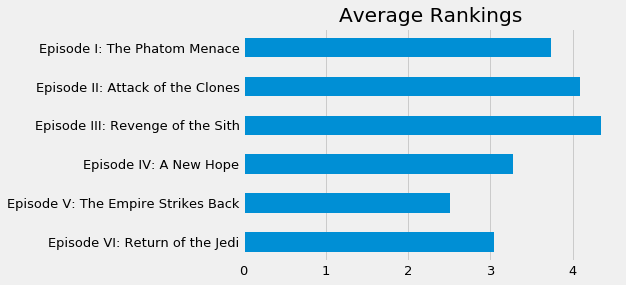

In [29]:
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

# Plot font parameters (for consistency)
smallFont = 11
medFont = 13
largeFont = 20

plt.rc('font', size=smallFont)          # controls default text sizes
plt.rc('axes', titlesize=largeFont)     # fontsize of the axes title
plt.rc('axes', labelsize=medFont)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=medFont)    # fontsize of the tick labels
plt.rc('ytick', labelsize=medFont)    # fontsize of the tick labels
plt.rc('legend', fontsize=smallFont)    # legend fontsize
plt.rc('figure', titlesize=largeFont)  # fontsize of the figure title

style.use('fivethirtyeight')


# Find mean ranking for each film (Lower is better)
# Flip ordering due to the order matplotlib plots axis elements
meanRanks = np.flip(star_wars[['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']].mean())

movies = ['Episode I: The Phatom Menace', 'Episode II: Attack of the Clones', 'Episode III: Revenge of the Sith',
          'Episode IV: A New Hope', 'Episode V: The Empire Strikes Back', 'Episode VI: Return of the Jedi']

meanRanks.index = np.flip(movies)

# Plot bar chart
meanRanks.plot.barh()
plt.title('Average Rankings')
plt.grid(axis='y', b=False)
plt.show()

Since **lower rankings are better**, *Star Wars: Episode V The Empire Strikes Back* is the best rated movie.

## The Most Watched Movie
The most popular movie, or the film which was viewed the most among the sample population can also be visualized relative to other films.

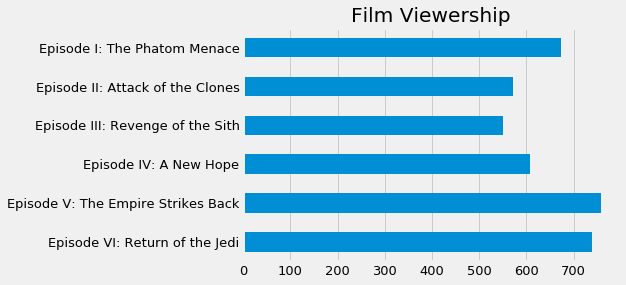

In [30]:
# Number of views per film
# Flip ordering due to the order matplotlib plots axis elements
viewCount = np.flip(star_wars[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].sum())

viewCount.index = np.flip(movies)

# Plot bar chart
viewCount.plot.barh()
plt.title('Film Viewership')
plt.grid(axis='y', b=False)
plt.show()

The original three Star Wars movies (Episodes IV - VI) rank among the most viewed films, which correspond to the good rankings seen for the same movies bar plot prior. This indicates that most fans consider the original Star Wars trilogy to be the best of the two trilogies.

## Segmenting by Gender
While we've already considered the rankings of the whole survey population, we can segment our data into groups to determine if there are any interesting trends in an individual group. Here the respondents are split by gender.

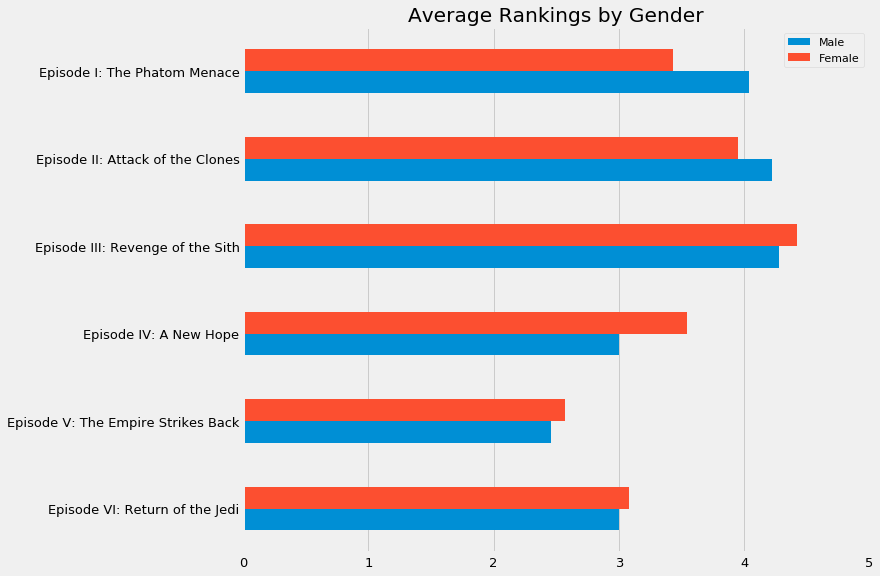

In [31]:
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]

# Find mean ranking for each film (by Gender)
meanRanks_m = males[['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']].mean()
meanRanks_f = females[['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']].mean()

# Flip ordering due to the order matplotlib plots axis elements
genderRanks = pd.DataFrame({'Male': np.flip(meanRanks_m.values), 'Female': np.flip(meanRanks_f.values)}, 
                           index=np.flip(movies))

ax = genderRanks.plot.barh(figsize=(10, 9))
ax.set_xlim([0,5])
ax.grid(axis='y', b=False)
ax.set_title('Average Rankings by Gender')
plt.show()

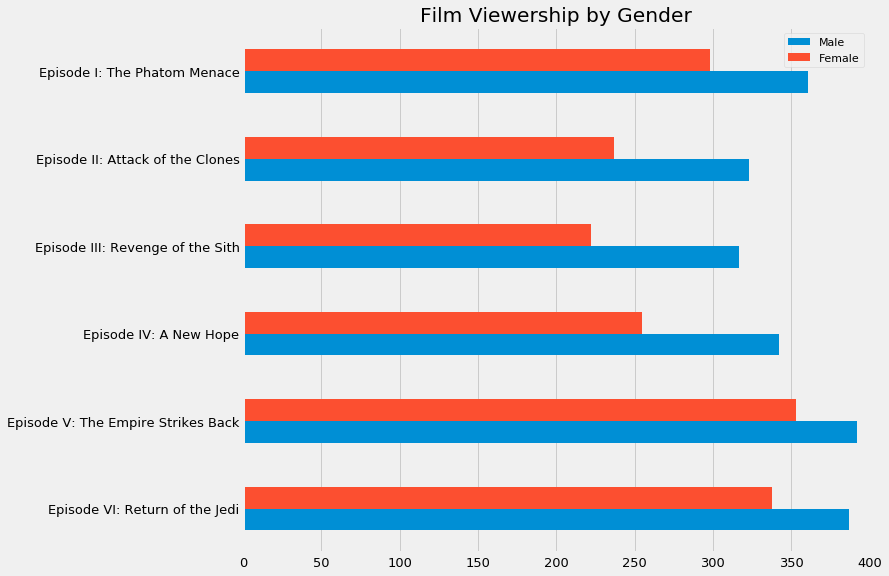

In [32]:
# Sum views for each film (by Gender)
viewCount_m = males[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].sum()
viewCount_f = females[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].sum()

# Flip ordering due to the order matplotlib plots axis elements
genderViews = pd.DataFrame({'Male': np.flip(viewCount_m.values), 'Female': np.flip(viewCount_f.values)},
                          index=np.flip(movies))

ax = genderViews.plot.barh(figsize=(10, 9))
ax.set_xlim([0,400])
ax.grid(axis='y', b=False)
ax.set_title('Film Viewership by Gender')
plt.show()

The majority of Star Wars movies are viewed more by males based on the population surveyed. While more males viewed episodes I-III, males tended to rate this trilogy worse than females. Ratings for episodes IV-VI are similar for both males and females in terms of relative proportion; they display similar trends compared to the overall population.

## Segmenting by Age
Next, both rankings and viewership will be segmented by age group to see if there is a difference in which films younger audiences prefer versus older audiences.

In [33]:
star_wars['Age'].value_counts(dropna=False)

45-60    291
> 60     269
30-44    268
18-29    218
NaN      140
Name: Age, dtype: int64

There appears to be four unique age range options for this survey question, with 140 participants leaving this question unanswered. To avoid introducing bias into our age analysis, we will ignore rows with missing values in the `Age` column.

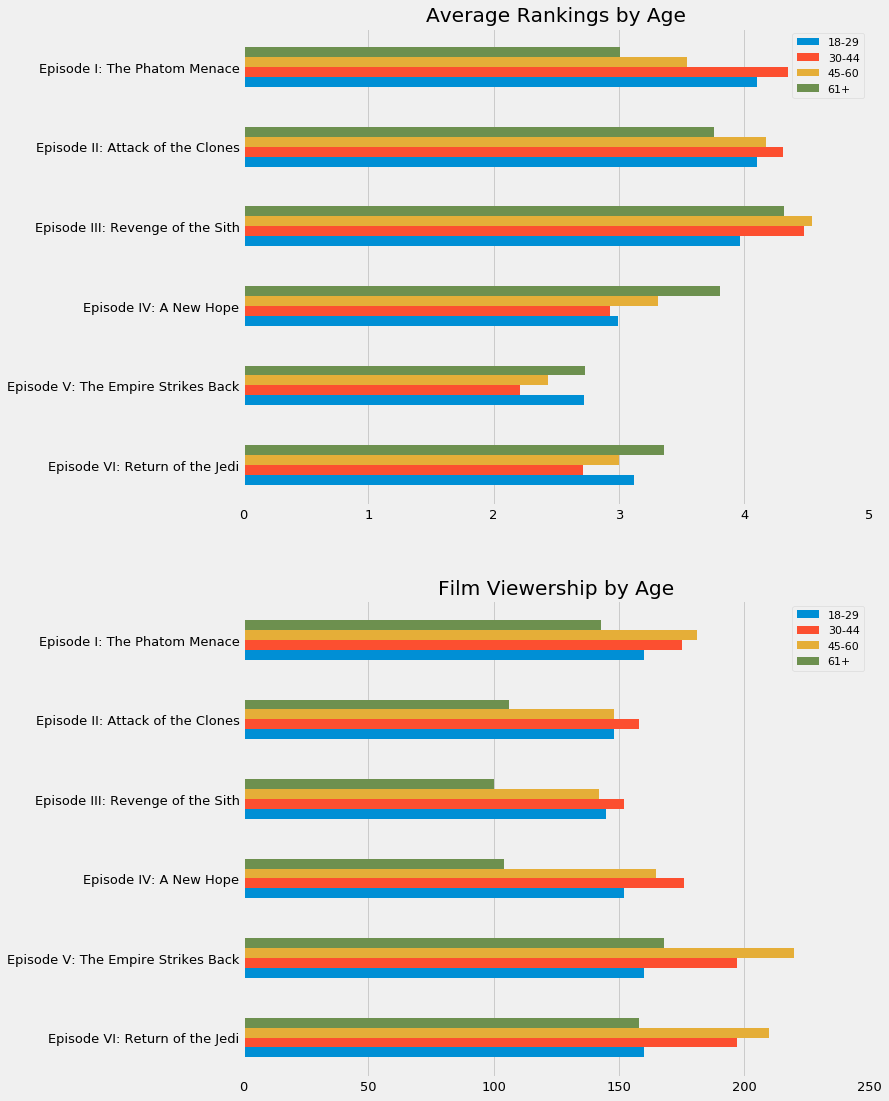

In [34]:
# Filter data by age groups
young = star_wars[star_wars['Age'] == '18-29'] 
midAge = star_wars[star_wars['Age'] == '30-44'] 
boomer = star_wars[star_wars['Age'] == '45-60'] 
senior = star_wars[star_wars['Age'] == '> 60']

ageGroups = [young, midAge, boomer, senior]
ageRanges = ['18-29', '30-44', '45-60', '61+']
meanRankings_byAge = {} # Dict to store mean movie ranks, key=ageRange
viewCounts_byAge = {}   # Dict to store viewership by film, key=ageRange

# Find mean ranking for each film (by Age)
for i in range(len(ageGroups)):
    ageGroup = ageGroups[i]
    ageRange = ageRanges[i]
    meanRank = ageGroup[['ranking_1','ranking_2','ranking_3','ranking_4','ranking_5','ranking_6']].mean()
    viewCounts = ageGroup[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6']].sum()
    
    # Flip ordering due to the order matplotlib plots axis elements
    meanRankings_byAge[ageRange] = np.flip(meanRank.values)
    viewCounts_byAge[ageRange] = np.flip(viewCounts.values)


ageRanks = pd.DataFrame(meanRankings_byAge,
                        index = np.flip(movies))

ageViews = pd.DataFrame(viewCounts_byAge,
                        index = np.flip(movies))

# Plots Graphs
fig, axes = plt.subplots(2,1)

ageRanks.plot.barh(figsize=(10, 18), ax=axes[0])
axes[0].set_xlim([0,5])
axes[0].set_title('Average Rankings by Age')
axes[0].grid(axis='y', b=False)

ageViews.plot.barh(figsize=(10, 18), ax=axes[1])
axes[1].set_xlim([0,250])
axes[1].set_title('Film Viewership by Age')
axes[1].grid(axis='y', b=False)

plt.show()

The following trends can be observed from visualizing the average rankings grouped by age:
- All age groups agree that Episode V is the best Star Wars film.
- Participants who were 30+ tend to dislike Episode III the most.
- Younger people (60 and below) prefer the all original trilogy films (Ep. IV-VI) over the more recent trilogy films (Ep. I-III), while the remaining oldest participants (61+) have split opinons on which film was better independent of which trilogy it is from.
- The older audience (45+) prefers Episode I much more than the younger audience (18-44), making it the most controversial film among different age groups.

From the graph illustrating the viewership by age we find:
- Despite being the largest grouping sampled, the oldest demographic (61+) has seen less Star Wars films compared to the younger demographics. This implies the Star Wars franchise should prioritize marketing towards their younger fans (< 60), since they make up a significant portion of their fanbase.
- The viewership for the youngest demographic for the original trilogy (Ep. IV-VI) tend to be low relative to those who are older. This could be due to a lack of interest in the younger generation for watching older films, or that the older demographic has more of an interest in the original trilogy rather than the newer films (Ep. I-III). More investigation would be required.

## Character Preferences
In this section of the notebook we will explore the general Star Wars character preferences of the survey respondents. More specifically, we will attempt to answer the following questions:
- Which character do respondents like the most?
- Which character do respondents dislike the most?
- Which character is the most controversial (split between likes and dislikes)?

During data cleaning and EDA, we identified that for each character listed, respondents were asked to rate the favorability of the character on an ordinal scale.

In [35]:
# Inpect unique values in first character column
star_wars[star_wars.columns[15:29]].iloc[:,0].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

Ideally, it would be preferred to work with numerical data instead of categorical data in order to extract summary statistics. Since the answer options follow a scale ranging from 'very unfavorably' to 'very favorably', we will assume that each option corresponds to a point-rating system. This is under the assumption that all steps in the numerical scale are equal from a category to an adjacent one. Our numerical favorability scale will be the following:
- **-2** = Very unfavorably
- **-1** = Somewhat unfavorably
-  **0** = Neither favorably nor unfavorably (neutral) / Unfamiliar (N/A) / NaN 
-  **1** = Somewhat favorably
-  **2** = Very favorably

Our goal will be to calculate the mean favorability score corresponding to each Star Wars character. To avoid biasing the score of one character based on familiarity, and the number of respondents who answered the question, we will assume that questions answered with *Unfamiliar (N/A)* or left blank as NaN, were answered with a neutral score of 0.

In [36]:
# Isolate character info from main dataframe
character_df = star_wars.copy()[star_wars.columns[15:29]]

# Fill missing vals with zero
character_df.fillna(0 ,inplace=True)

# Impute the numerical scores corresponding to characters
favScore_map = {
    'Very unfavorably': -2,
    'Somewhat unfavorably': -1,
    'Neither favorably nor unfavorably (neutral)': 0,
    'Unfamiliar (N/A)': 0,
    'Somewhat favorably': 1,
    'Very favorably': 2
}

character_df.replace(to_replace=favScore_map ,inplace=True)

character_df.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,2,2,2,2,2,2,2,0,0,2,2,2,2,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0
4,2,2,2,2,2,1,2,1,-1,2,2,2,2,2
5,2,1,1,-1,2,-2,1,0,2,1,1,-2,1,1


In [37]:
# Verify there are no missing values in columns
character_df.isnull().sum()

Han Solo                0
Luke Skywalker          0
Princess Leia Organa    0
Anakin Skywalker        0
Obi Wan Kenobi          0
Emperor Palpatine       0
Darth Vader             0
Lando Calrissian        0
Boba Fett               0
C-3P0                   0
R2 D2                   0
Jar Jar Binks           0
Padme Amidala           0
Yoda                    0
dtype: int64

In [38]:
# Compute mean score for each character
character_scores = character_df.mean().sort_values(ascending=False)
print(character_scores)

Han Solo                1.147555
Yoda                    1.121417
Obi Wan Kenobi          1.112142
Luke Skywalker          1.099494
R2 D2                   1.085160
Princess Leia Organa    1.079258
C-3P0                   0.961214
Anakin Skywalker        0.504216
Lando Calrissian        0.360877
Padme Amidala           0.331366
Darth Vader             0.329680
Boba Fett               0.204890
Emperor Palpatine       0.039629
Jar Jar Binks          -0.131535
dtype: float64


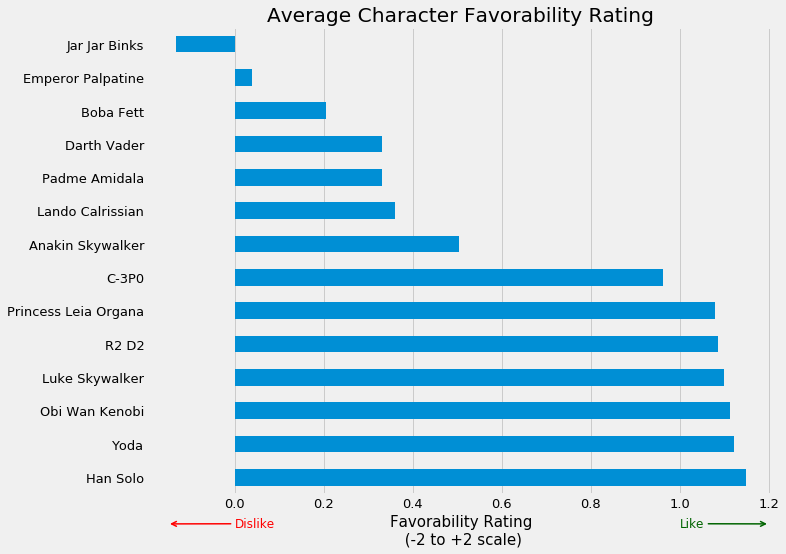

In [39]:
# Visualize the scores
ax = character_scores.plot.barh(title='Average Character Favorability Rating', figsize=(10, 8))
ax.set_xlabel('Favorability Rating\n (-2 to +2 scale)', size=15)
ax.annotate(s='Like', xy=(1.2,-1.4), xytext=(1.0,-1.5), fontsize=12, color='darkgreen',
            arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.5), 
            annotation_clip=False)
ax.annotate(s='Dislike', xy=(-0.15,-1.4), xytext=(0,-1.5), fontsize=12, color='red',
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5), 
            annotation_clip=False)
ax.grid(axis='y', b=False)
plt.show()

Based on the average ratings of characters listed, it seems that Jar Jar Binks is the most disliked character in the Star Wars universe. On the other hand, respondents voted Han Solo as the most liked character. The most controversial character, where favorability ratings were split the most evenly between likes and dislikes, was Emperor Palpatine.

## Conclusion
On the basis of the analysis presented, *Star Wars: Episode V The Empire Strikes Back* is the best, as well as the most viewed Star Wars film according to survey respondents. Generally, good movie ratings correlated with high viewership. In fact it was determined that on average, movies from the original Star Wars trilogy (Ep. IV-VI) were rated better than those from the the prequel trilogy. 

Segmenting the data by gender, we found that while more males viewed Episodes I-III, they also rated this trilogy worse compared to females. Otherwise, similar trends were displayed for both genders relative to the overall population of respondents.

Segmenting by age groups we found that respondents who were 30+ disliked Episode III the most. Additionally those ages 60 and below prefer the original trilogy over the prequel trilogy. This doesn't hold true for those over 60, where there are split opinions on which film was better, independent of which trilogy it belongs to. With regards to viewership, the oldest demographic had seen less star wars films compared to other age groups. This implies that the franchise should market towards their younger fans (<60) since they make up a significant portion of their fanbase. Lastly, the youngest demographic (18-29) had low viewership for films from the original trilogy compared to the middle age demographic.

With regards to favorability of various characters, survey respondents reported the following:
- **Most disliked:** Jar Jar Binks
- **Most Liked:** Han Solo
- **Most Controversial:** Emperor Palpatine